# 逻辑回归代码实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import accuracy_score

##### 加载数据的函数

In [2]:
def loaddata():
    data = np.loadtxt('data1.txt',delimiter=',')  # data--数组
#     print(type(data))
#     print(data.shape)
    n = data.shape[1] - 1  # 特征数
    X = data[:, 0:n]
#     print(X.shape)
    y = data[:, -1].reshape(-1, 1)
#     print(y.shape)
    return X, y

##### 画散点图

In [3]:
def plot(X,y):
    pos = np.where(y==1)   # y=1的索引
    neg = np.where(y==0)   # y=1的索引
#     print(pos)
    
    plt.scatter(X[pos[0],0],X[pos[0],1],marker='x')
    plt.scatter(X[neg[0], 0], X[neg[0], 1], marker='o')
    
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.show()

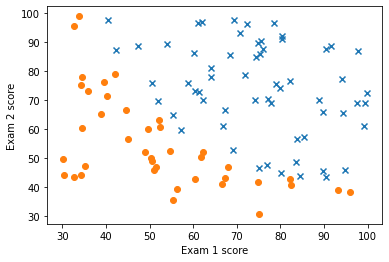

In [4]:
X,y = loaddata()
# print(X)
plot(X,y)

### 实现sigmoid函数
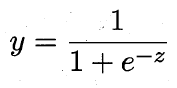

In [5]:
def sigmoid(z):
    r= 1/(1+np.exp(-z))
    return r

sigmoid(3)

0.9525741268224334

### 实现假设函数
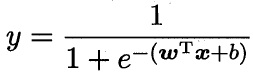

In [6]:
def hypothesis(X,theta):   #  theta,即系数w
    z=np.dot(X,theta)
    return sigmoid(z)    

##### 损失函数
<img src="images/03.png" width="250" align="left"/>

In [7]:
def computeCost(X,y,theta):
    m=X.shape[0]
    l=-1*y*np.log(hypothesis(X,theta))-(1-y)*np.log(1-hypothesis(X,theta))
    return np.sum(1)/m
    

##### 梯度下降法求解
<img src="images/04.png" width="250" align="left"/>

In [8]:
def gradientDescent(X,y,theta,iterations,alpha):  #  theta,即系数w
    #取数据的条数
    m=X.shape[0]
    
    #在x最前面插入全1的列
    X=np.hstack((np.ones((m,1)),X))
    
    for i in range(iterations):
        for j in range(len(theta)):
            #迭代公式，reshape(-1,1)转换成1列
            theta[j]=theta[j]-(alpha/m)*np.sum((hypothesis(X,theta)-y)*X[:,j].reshape(-1,1))
        if(i%10000==0):
            #每迭代1000次输出一次损失值
             print('第',i,'次迭代，当前损失为：',computeCost(X,y,theta),'theta=',theta)
    return theta

##### 预测函数

In [9]:
def predict(X):
    #取数据条数
    m=X.shape[0]
    # 在x最前面插入全1的列，横向合并
    X=np.hstack((np.ones((m,1)),X))
    #求解假设函数的值
    h = hypothesis(X,theta)
    #根据概率值决定最终的分类,>=0.5为1类，<0.5为0类
    h[h>=0.5]=1
    h[h<0.5]=0
    return h

In [10]:
X,y = loaddata()

n = X.shape[1]  #特征数
theta = np.zeros(n+1).reshape(n+1, 1)  # theta是列向量,+1是因为求梯度时X前会增加一个全1列
iterations = 250000
alpha = 0.008

theta = gradientDescent(X,y,theta,iterations,alpha)
print('theta=\n',theta)

第 0 次迭代，当前损失为： 0.01 theta= [[ 0.0008    ]
 [ 0.0959687 ]
 [-0.17080118]]
第 10000 次迭代，当前损失为： 0.01 theta= [[-5.98801985]
 [ 0.0285522 ]
 [ 0.32602287]]
第 20000 次迭代，当前损失为： 0.01 theta= [[-11.0518636 ]
 [ -0.05094939]
 [  0.20266973]]
第 30000 次迭代，当前损失为： 0.01 theta= [[-14.66995062]
 [ -0.06342536]
 [  0.3110437 ]]
第 40000 次迭代，当前损失为： 0.01 theta= [[-1.76671022e+01]
 [ 2.29071853e-01]
 [ 1.58711438e-02]]
第 50000 次迭代，当前损失为： 0.01 theta= [[-19.61908473]
 [  0.18701435]
 [  0.19631039]]
第 60000 次迭代，当前损失为： 0.01 theta= [[-20.98824735]
 [  0.26787817]
 [  0.1215997 ]]
第 70000 次迭代，当前损失为： 0.01 theta= [[-22.01666587]
 [  0.19051574]
 [  0.21622205]]
第 80000 次迭代，当前损失为： 0.01 theta= [[-22.85743719]
 [  0.18382044]
 [  0.14578984]]
第 90000 次迭代，当前损失为： 0.01 theta= [[-23.53290128]
 [  0.16267748]
 [  0.18365066]]
第 100000 次迭代，当前损失为： 0.01 theta= [[-24.07165445]
 [  0.23997356]
 [  0.12305231]]
第 110000 次迭代，当前损失为： 0.01 theta= [[-24.49944757]
 [  0.14702523]
 [  0.23826127]]
第 120000 次迭代，当前损失为： 0.01 theta= [[-24.8

##### 画决策边界

In [11]:
def plotDescisionBoundary(X,y,theta):
    cm_dark = mpl.colors.ListedColormap(['g', 'r'])
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.scatter(X[:,0],X[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)

    #画分类决策面： theta0+theta1*x1+theta2*x2 = 0
    # x1 = np.arange(20,110,0.1)
    x1 = np.arange(min(X[:, 0]), max(X[:, 0]), 0.1)
    x2 = -(theta[1]*x1+theta[0])/theta[2]
    plt.plot(x1,x2)
    plt.show()

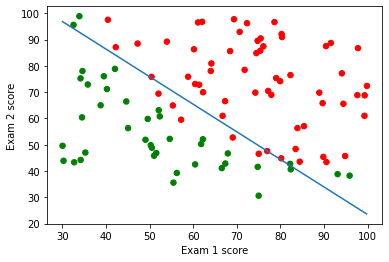

In [12]:
plotDescisionBoundary(X,y,theta)

In [13]:
p = predict(X)
print('准确度：',np.mean(p==y))
print('准确度：',accuracy_score(y,p))

准确度： 0.89
准确度： 0.89


In [14]:
# 方法2： 使用sklearn模块实现
